# Big Data Mart Sales Problems

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

# Examining the Data

In [2]:
#importing train csv file

data_train=pd.read_csv("bigdatamart_Train.csv")

#importing test csv file

data_test=pd.read_csv("bigdatamart_Test.csv")


In [3]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#checking for the shape of the data

print(data_train.shape)

(8523, 12)


In [5]:
#checking for null values isnull method

data_train.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

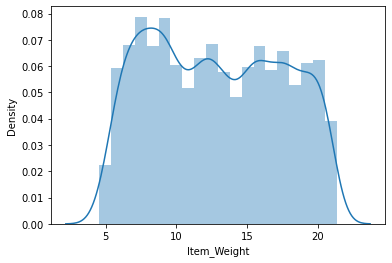

In [6]:
#checking for distplot to fill the nan values

sns.distplot(data_train['Item_Weight']) 

* seems to be like normal distribution so by using mean method we fill the values



In [7]:
#filling the missing colimns using mean method

data_train['Item_Weight']=data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean())

In [8]:
# filling the missing columns using mode method

data_train['Outlet_Size']=data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0])

In [9]:
# again checking for the isnull method for train data

data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
# checking for info

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* The data types from info method seems to be correct for all the columns in the dataset


In [11]:
# lets check for describe method

data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


from the describe method we can know that the average weight of the product is 12,
the standard deviation is 4 
the data looks normal for the item_weight column,
the data for item_visibility also looks decent,
for other columns also the data looks normal but in the sales are some up and downs but no need to worry about the sales since that we are going to predict


In [12]:
#checking unique values in dataset
data_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
#checking for catogorical variables

cat_col=[]
for x in data_train.dtypes.index:
    if data_train.dtypes[x]=="object":
        cat_col.append(x)
        
print(cat_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


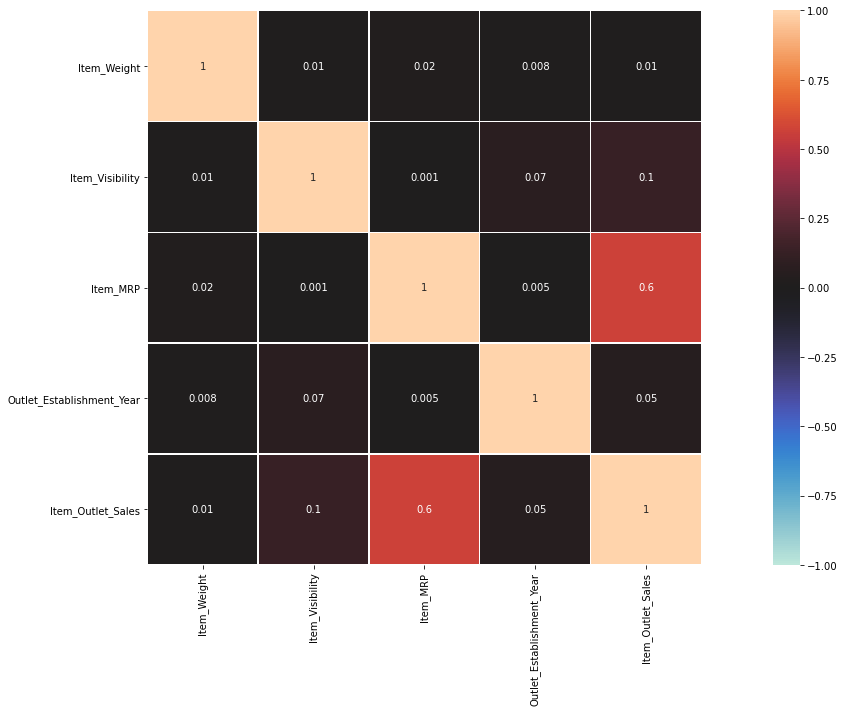

In [14]:
#lets plot the heat map to find the corelation

df_corr=data_train.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

From heat map we can see that there is no much corelation between one feature with the other feature, but with label the highest corelated columns is item_mrp of 60% where low corleated with item_weight

As per my analysis i feel some of the features are not required for the increase of the sales like item_id, item_visibility(area alloted for the products to be stored) may be there will be little contribution but not more so i want to drop that columns too and store id that is also not required beacause we may get online when we search so lets go ahead and delete all the columns which r mentioned

In [15]:
# droping the columns

data_train=data_train.drop(['Item_Identifier','Item_Visibility','Outlet_Identifier'],axis=1)

I feel remaining all the other features will help me in predicting the sales let me explain about the features item_weight some customers they prefer to take products based on the weight because in their family the size of the members may be less or more based on them they count the product on weight,item_fat that also everyone sees beacuse in this the persons health comes into picture may be that patient may be a patient or non patient but they concern about the health so sales also depends on that if it is of low fat they buy the product so for this instead of explaining in this lets plot the graphs for all the features v/s label and lets check

In [16]:
# creating small values for the establishment of the year

data_train['Outlet_Years']=2013-data_train['Outlet_Establishment_Year']
data_train['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

We are reducing the year of the establishment to the lesser values using, the data scientists when they have collected the data that year minus the establishment year so that we get good results on the basis of smalling the year

In [17]:
# droping the outlet _establishment_year beacuse we have got new column

data_train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)


In [18]:
# converting the string data as continous data using lable encoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
item=lab_enc.fit_transform(data_train['Item_Type'])
item

array([ 4, 14, 10, ...,  8, 13, 14])

In [19]:
pd.Series(item)

0        4
1       14
2       10
3        6
4        9
        ..
8518    13
8519     0
8520     8
8521    13
8522    14
Length: 8523, dtype: int64

In [20]:
data_train['Item_Type']=item

In [21]:
# converting the string data.

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_train['Outlet_Type'])
type

array([1, 2, 1, ..., 1, 2, 1])

In [22]:
pd.Series(type)

0       1
1       2
2       1
3       0
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Length: 8523, dtype: int64

In [23]:
data_train['Outlet_Type']=type

In [24]:
# converting the string data to continous data.

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
item_fat=lab_enc.fit_transform(data_train['Item_Fat_Content'])
item_fat

array([1, 2, 1, ..., 1, 2, 1])

In [25]:
pd.Series(item_fat)

0       1
1       2
2       1
3       2
4       1
       ..
8518    1
8519    2
8520    1
8521    2
8522    1
Length: 8523, dtype: int64

In [26]:
data_train['Item_Fat_Content']=item_fat

In [27]:
data_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [28]:
# converting the string data to continous data.

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
outlet=lab_enc.fit_transform(data_train['Outlet_Size'])
outlet

array([1, 1, 1, ..., 2, 1, 2])

In [29]:
pd.Series(outlet)

0       1
1       1
2       1
3       1
4       0
       ..
8518    0
8519    1
8520    2
8521    1
8522    2
Length: 8523, dtype: int64

In [30]:
data_train['Outlet_Size']=outlet

In [31]:
# converting the string data to continous data.

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
outlet_location=lab_enc.fit_transform(data_train['Outlet_Location_Type'])
outlet_location

array([0, 2, 0, ..., 1, 2, 0])

In [32]:
pd.Series(outlet_location)

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Length: 8523, dtype: int64

In [33]:
data_train['Outlet_Location_Type']=outlet_location

In [34]:
data_train

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,1,4,249.8092,1,0,1,3735.1380,14
1,5.920,2,14,48.2692,1,2,2,443.4228,4
2,17.500,1,10,141.6180,1,0,1,2097.2700,14
3,19.200,2,6,182.0950,1,2,0,732.3800,15
4,8.930,1,9,53.8614,0,2,1,994.7052,26
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,13,214.5218,0,2,1,2778.3834,26
8519,8.380,2,0,108.1570,1,1,1,549.2850,11
8520,10.600,1,8,85.1224,2,1,1,1193.1136,9
8521,7.210,2,13,103.1332,1,2,2,1845.5976,4


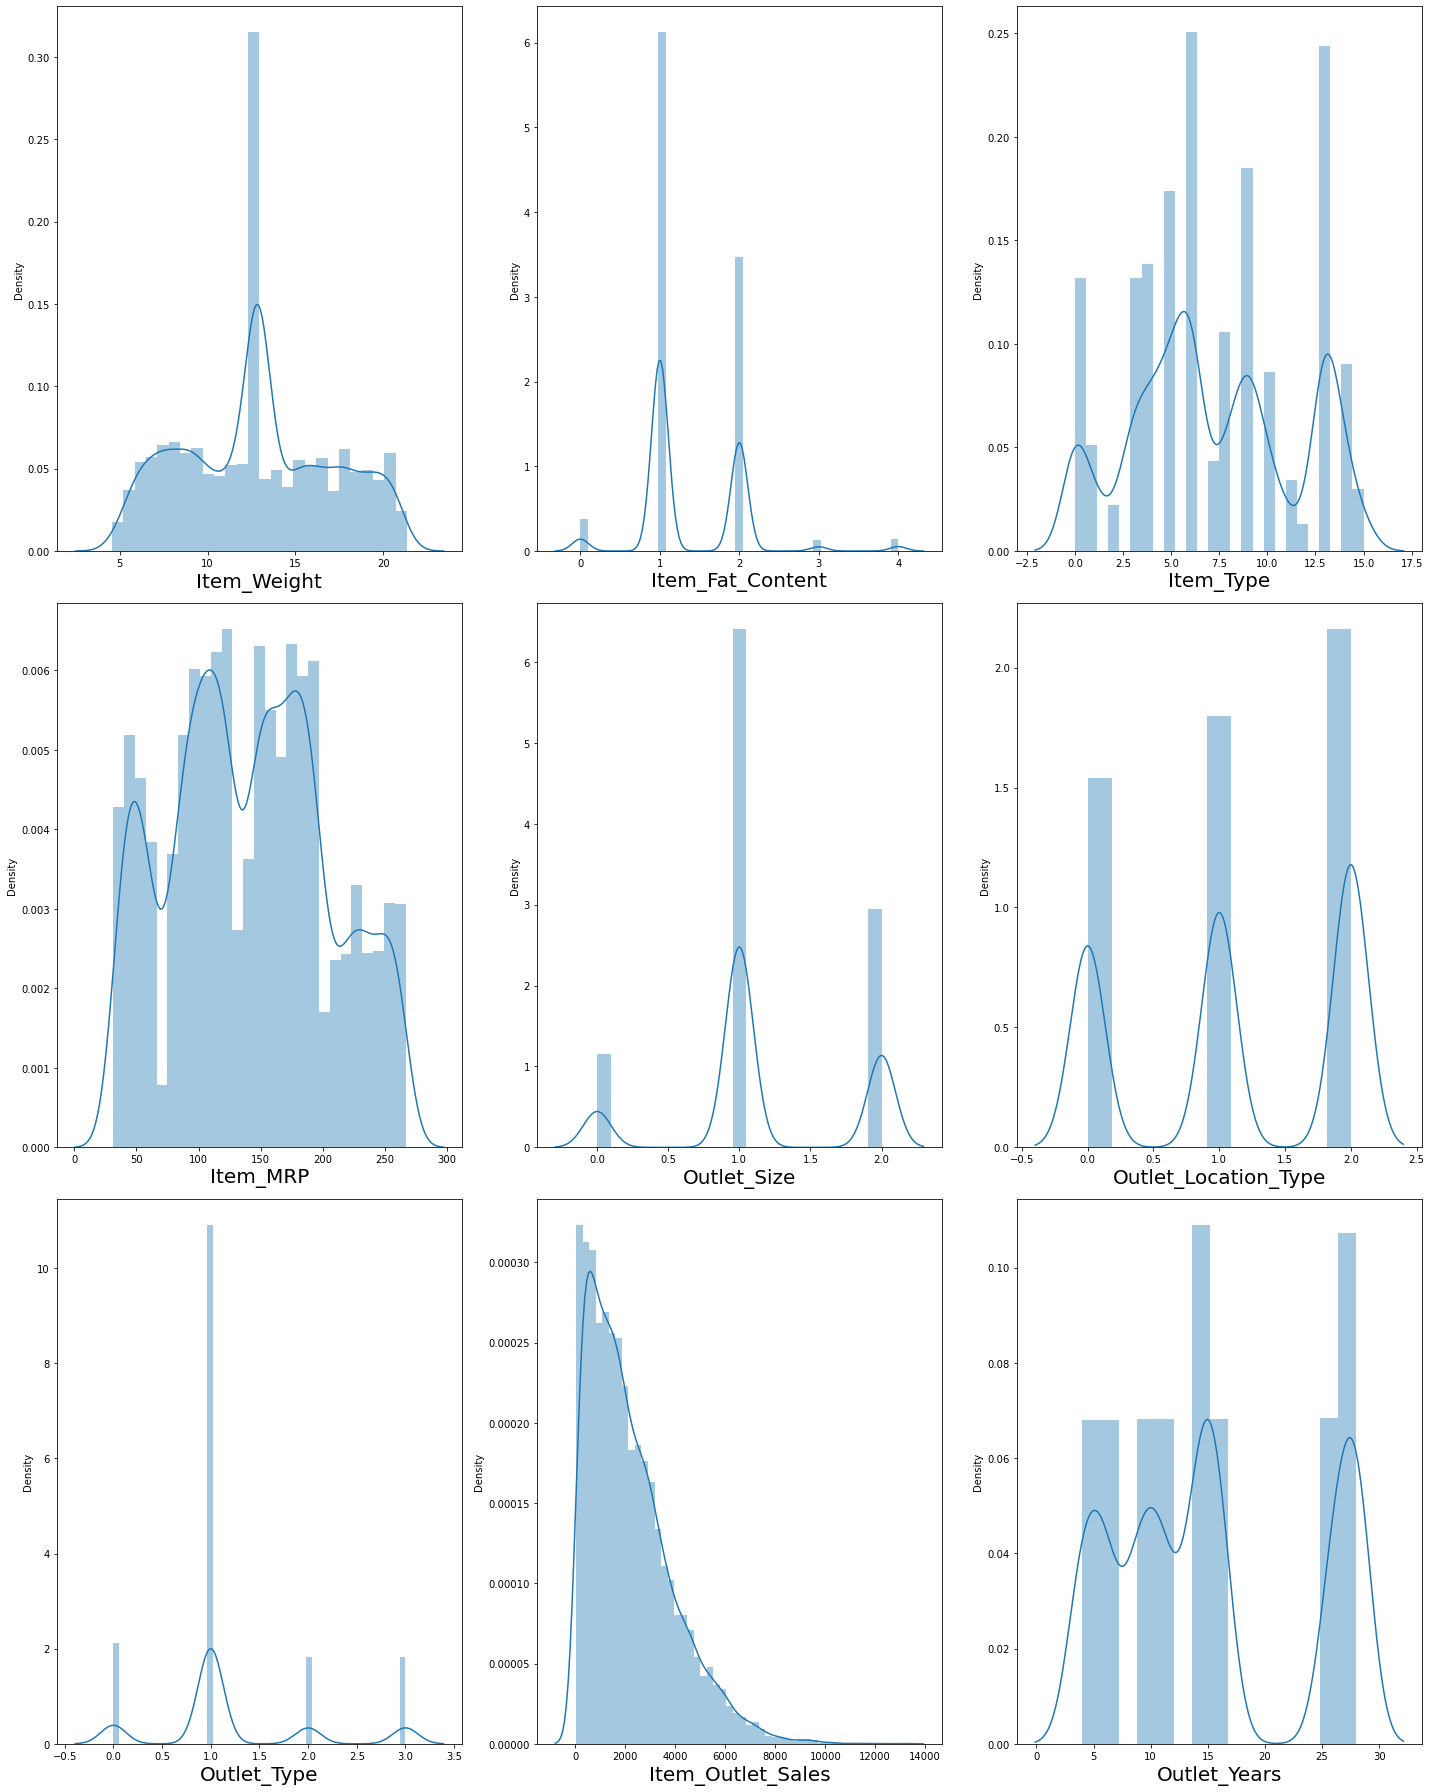

In [36]:
# ploting the distribution to check the distribution.

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_train:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


Except 'Item Outlet Sales' all data distributed normally

In [37]:
# removing the skewness using "log transforation"

data_train['Item_Outlet_Sales']=np.log(1+data_train['Item_Outlet_Sales'])


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

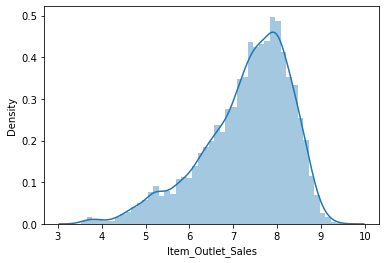

In [38]:
sns.distplot(data_train['Item_Outlet_Sales'])

 Now Item_Outlet_Sales reduced skewness

In [40]:
# Seperating features and label columns

x=data_train.drop(columns=['Item_Outlet_Sales'],axis=1)
y=data_train['Item_Outlet_Sales']

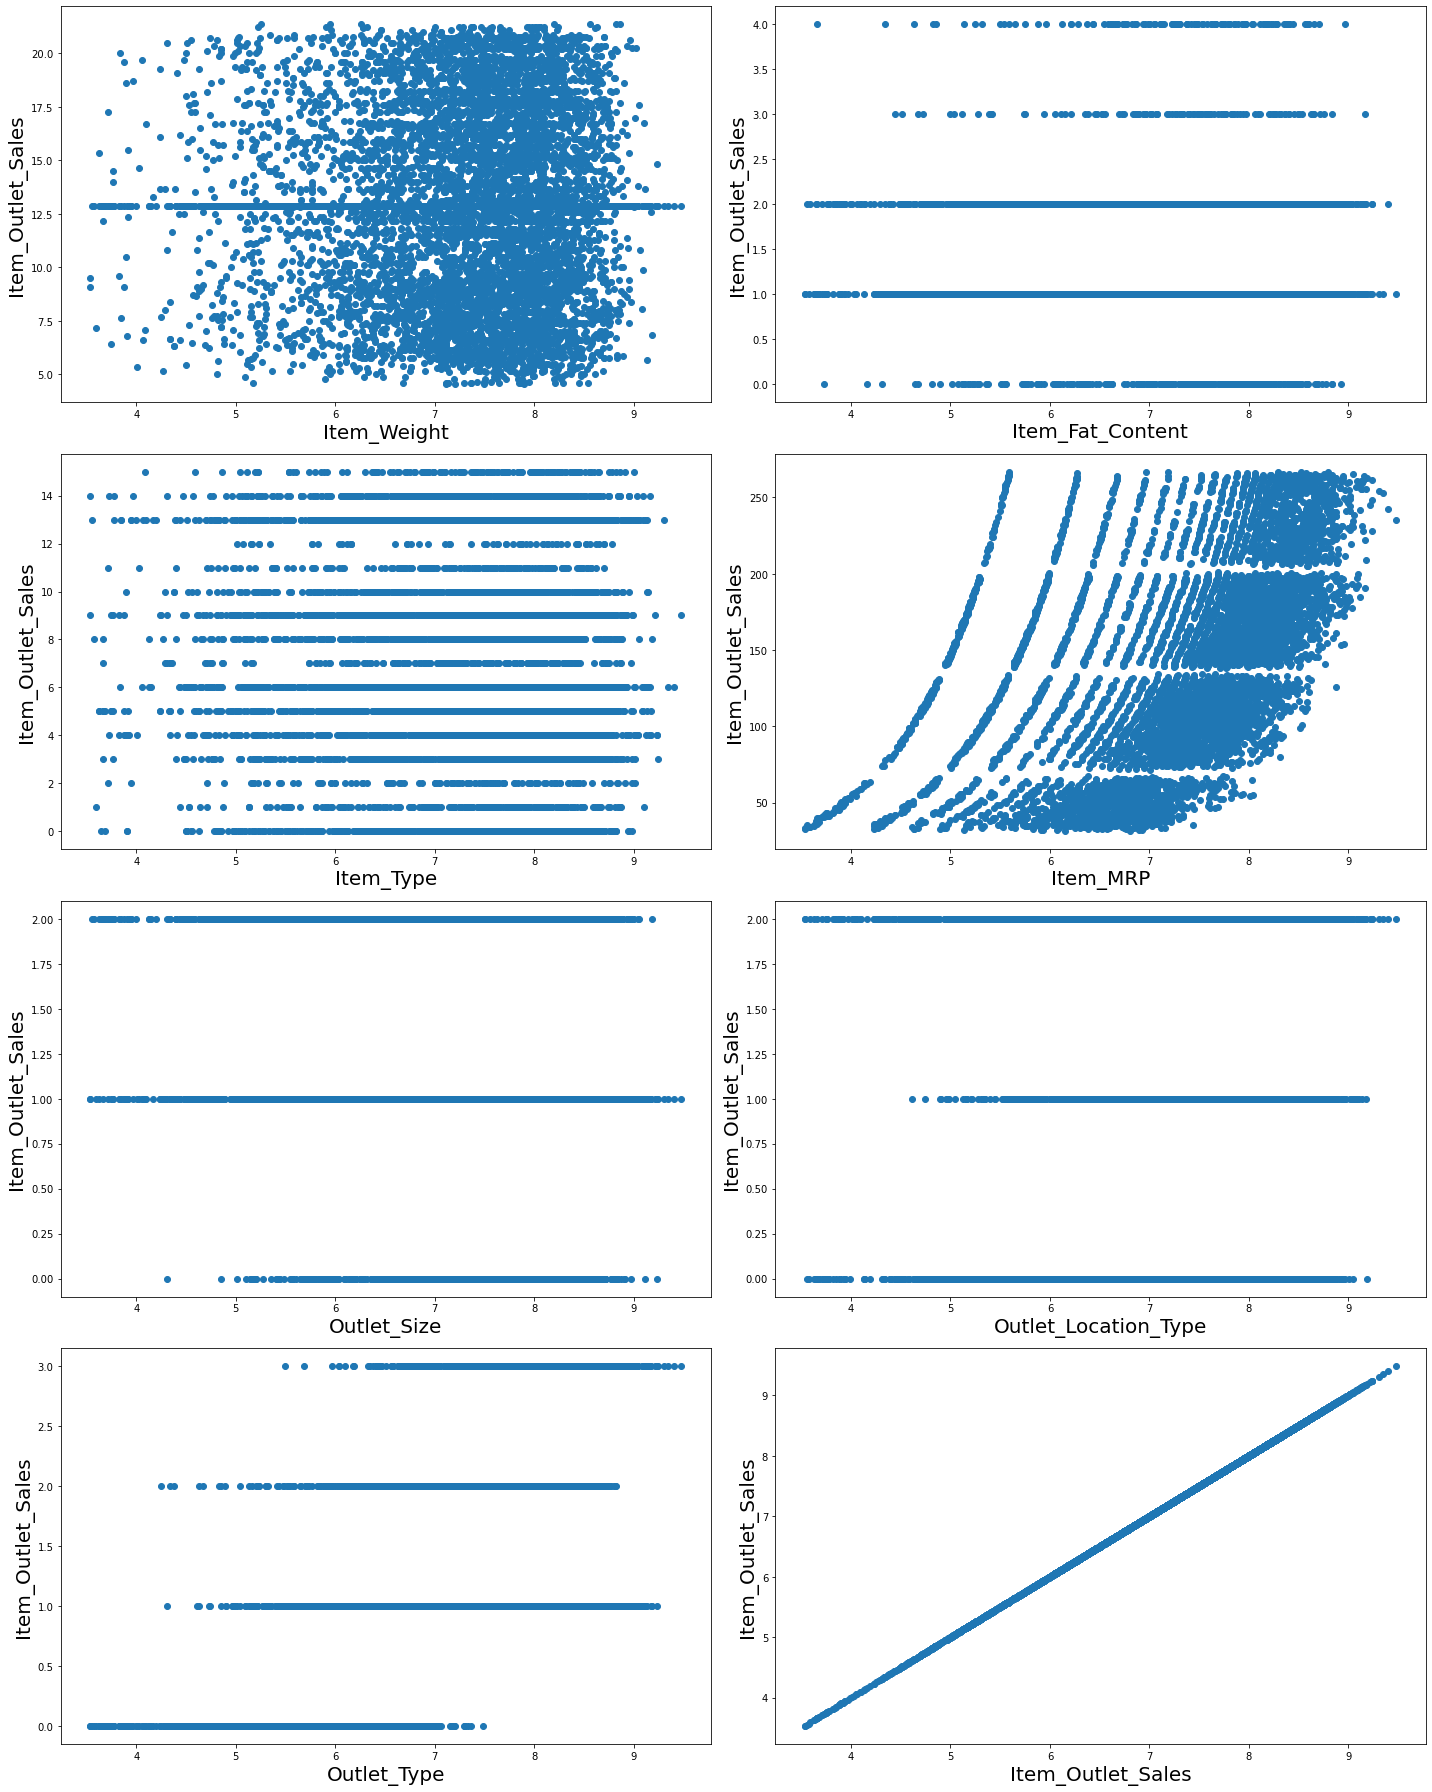

In [43]:
# ploting to see the distribution of data.

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_train:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(y,data_train[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnumber+=1

plt.tight_layout()

From the scatter plot we can compare our feature and label relation

1.In the first graph of item weight and sales if the price range from 6 to 8 the sales are high that means they are corelated to each other based on the weight of the product the sales of the product depends.

2.When the item has high fat content is more the sales are very less of 1 to 2 which means that the sales and fat content are inversly proportion to each other when ever the product has less fat content then only the sales increases.

3.Based on the item type the sales increases, on the type of products 4 and 5 the sales are very less but after the type 5 the less got increased so mostly the customers are investing more on the products after the 5th type on the type 4 or type 5.

4.The item mrp and sales are directly proportions as the prouct MRP is more the sales are also increasing in the same manner so by this we can say both are corelated.In all the other products also the features and label are directly corelated.so each and every feature has their contribution on the outlet sales.


In [45]:
#scailing the age and fare column because of the continous data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scale=['Item_Weight','Item_MRP','Outlet_Years']
data_train[feature_scale]=scaler.fit_transform(data_train[feature_scale])
data_train.head()


,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,-0.841872,1,4,1.747454,1,0,1,8.225808,-0.139541
1,-1.641706,2,14,-1.489023,1,2,2,6.096776,-1.334103
2,1.098554,1,10,0.010040,1,0,1,7.648868,-0.139541
3,1.500838,2,6,0.660050,1,2,0,6.597664,-0.020085
4,-0.929428,1,9,-1.399220,0,2,1,6.903451,1.293934


# Excuting texting data

In [46]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [47]:
#checking for the shape of the data

data_test.shape

(5681, 11)

In [48]:
#checking for null values isnull method

data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [50]:
# filling missing values using mean method

data_test['Item_Weight']=data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())


In [53]:
# filling missing values using mode method

data_test['Outlet_Size']=data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0])

In [55]:
# checking null value again.

data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [56]:
# creating small values for the establishment of the year

data_test['Outlet_Years']=2013-data_test['Outlet_Establishment_Year']
data_test['Outlet_Years'] 

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

In [58]:
# droping columns which dont contribute much for sales

data_test=data_test.drop(['Item_Identifier','Item_Visibility','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [60]:
# converting string data into continous data, using label encoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
item=lab_enc.fit_transform(data_test['Item_Type'])
item

array([13,  4, 11, ...,  8,  3,  3])

In [61]:
pd.Series(item)
data_test['Item_Type']=item

In [63]:
# converting string data into continous data, using label encoder

lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_test['Outlet_Type'])
pd.Series(type)
data_test['Outlet_Type']=type

lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_test['Outlet_Location_Type'])
pd.Series(type)
data_test['Outlet_Location_Type']=type

lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_test['Outlet_Size'])
pd.Series(type)
data_test['Outlet_Size']=type

lab_enc=LabelEncoder()
type=lab_enc.fit_transform(data_test['Item_Fat_Content'])
pd.Series(type)
data_test['Item_Fat_Content']=type


In [64]:
# scaling the age and fare column because of the continous data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scale=['Item_Weight','Item_MRP','Outlet_Years']
data_test[feature_scale]=scaler.fit_transform(data_test[feature_scale])


In [65]:
data_test.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,1.897460e+00,1,13,-0.536555,1,0,1,-0.139891
1,-1.035530e+00,4,4,-0.868937,1,1,1,-1.095512
2,4.486336e-01,1,11,1.629848,1,2,0,-0.020438
3,-1.267578e+00,1,13,0.226697,1,1,1,-1.095512
4,-5.230960e-14,2,4,1.508110,1,2,3,1.532446


In [66]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,-0.841872,1,4,1.747454,1,0,1,8.225808,-0.139541
1,-1.641706,2,14,-1.489023,1,2,2,6.096776,-1.334103
2,1.098554,1,10,0.010040,1,0,1,7.648868,-0.139541
3,1.500838,2,6,0.660050,1,2,0,6.597664,-0.020085
4,-0.929428,1,9,-1.399220,0,2,1,6.903451,1.293934


In [67]:
# seperating feature column and lable column

x=data_train.drop(columns=['Item_Outlet_Sales'],axis=1)
y=data_train['Item_Outlet_Sales']

In [69]:
#importing all the required libraries to build model

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics


# Liner Regression

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=250)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Predicting Model Evaluvation

In [71]:
y_pred_test=lr.predict(x_test)

# Actual Prediction

In [72]:
y_pred=lr.predict(data_test)
y_pred

array([7.48367746, 7.01100593, 6.87924423, ..., 7.15641943, 8.09161946,
       6.83031597])

Model Evaluvation

In [73]:
lr.score(x_test,y_test)

0.5745482047283981

In [74]:
# finding cross val score 

scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  57.94236492363108


Error Calculating

In [75]:
mean_squared_error(y_test,y_pred_test)

0.43552453363181787

In [76]:
mean_absolute_error(y_test,y_pred_test)

0.5223308956000042

In [77]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7227246333147945

# KNeighbores Regressor

In [79]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [80]:
y_pred_test=knn.predict(x_test)

In [81]:
y_pred=knn.predict(data_test)
y_pred

array([7.49827676, 7.89484181, 6.75448181, ..., 7.49769284, 8.16327529,
       7.34049207])

Metric Evaluvation

In [82]:
knn.score(x_test,y_test)*100

65.42526724475877

In [83]:
# finding cross val score

scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  65.73481607168694


Error Calculation

In [84]:
mean_squared_error(y_test,y_pred_test)

0.35393303133339205

In [85]:
mean_absolute_error(y_test,y_pred_test)

0.460361085814657

In [86]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.6784991420883721

# Decision Tree Regressor

In [87]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [89]:
# predicting for x_test

y_pred_test=DT.predict(x_test)
y_pred_test

array([7.30813548, 9.00451342, 6.50747023, ..., 7.64409748, 6.26716639,
       7.96459234])

In [90]:
# predicting for data_test
y_pred=DT.predict(data_test)
y_pred

array([7.36451281, 7.15409647, 6.18833394, ..., 7.78787817, 8.06678919,
       6.94663747])

Metric Evalivation

In [91]:
# score

DT.score(x_test,y_test)*100

44.471020949823924

In [92]:
# finding cross val score

scr=cross_val_score(DT,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  45.22255606635448


Error Calculation

In [93]:
mean_squared_error(y_test,y_pred_test)

0.5684364943962705

In [94]:
mean_absolute_error(y_test,y_pred_test)

0.576025346679597

In [95]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7589633368480964

# Random Forest Regression

In [96]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
y_pred=RF.predict(data_test)
y_pred

array([7.25958535, 7.16785407, 6.48014502, ..., 7.33385137, 8.0892228 ,
       7.01814799])

Metric Evaluvation

In [99]:
RF.score(x_test,y_test)*100

68.47663633995604

In [100]:
# finding cross val score

scr=cross_val_score(RF,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  69.51577224427375


Error Calculation

In [101]:
mean_squared_error(y_test,y_pred_test)

0.5684364943962705

In [102]:
mean_absolute_error(y_test,y_pred_test)

0.576025346679597

In [103]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7589633368480964

# Lasso Regressor

In [104]:
lp=Lasso()
lp.fit(x_train,y_train)

Lasso()

In [105]:
y_pred=lp.predict(data_test)
y_pred

array([7.29123116, 7.29123116, 7.29123116, ..., 7.29123116, 7.29123116,
       7.29123116])

Metric Evaluvation

In [106]:
lp.score(x_test,y_test)*100

-0.0687331309938255

In [107]:
# finding cross val score

scr=cross_val_score(lp,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  -0.0670918559903777


Error Calculation

In [109]:
mean_squared_error(y_test,y_pred_test)

0.5684364943962705

In [110]:
mean_absolute_error(y_test,y_pred_test)

0.576025346679597

In [111]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7589633368480964

# Ridge Regressor

In [112]:
# initiating the model

rp=Ridge()
rp.fit(x_train,y_train)

Ridge()

In [115]:
# predicting for test data

y_pred_test=rp.predict(x_test)
y_pred_test

array([7.74445265, 9.09787146, 6.38303112, ..., 7.45373396, 7.27136495,
       7.36833328])

In [117]:
# predicting data_test

y_pred=rp.predict(data_test)
y_pred

array([7.48311766, 7.01090433, 6.87992463, ..., 7.15632146, 8.09134175,
       6.83027048])

Metric evaluvation

In [118]:
# finding the score

rp.score(x_test,y_test)

0.5745428543594486

In [119]:
# finding cross val score

scr=cross_val_score(rp,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  57.94247924679177


Error Calculation

In [120]:
mean_squared_error(y_test,y_pred_test)

0.4355300106728538

In [121]:
mean_absolute_error(y_test,y_pred_test)

0.5223257848257888

In [122]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7227210975374864

# Hyper Parameter Tuning

In [123]:
# Hyper Parameter Tuning GridSearchCV

params={'n_estimators':[10,20,30],'max_features':['auto','sqrt','log2'],'min_samples_split':[2,4,8],'bootstrap':[True, False]}
grid = GridSearchCV(RF,param_grid=params)
grid.fit(x_train,y_train)
grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 30}

# Random Forest Tuning

In [126]:
RF=RandomForestRegressor(bootstrap=True,max_features='log2',min_samples_split=8,min_samples_leaf=2,n_estimators=30)
RF.fit(x_train,y_train)
y_pred=RF.predict(data_test)

In [127]:
RF.score(x_test,y_test)*100


70.99486472987829

In [129]:
#Finding cross val score

scr=cross_val_score(RF,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  71.6518511334917


In [130]:
mean_squared_error(y_test,y_pred_test)

0.4355300106728538

In [131]:
mean_absolute_error(y_test,y_pred_test)

0.5223257848257888

In [132]:
np.sqrt(mean_absolute_error(y_test,y_pred_test))

0.7227210975374864

Seems to be our score got improved by using hyper parameter tuning.
So,our best fit model is Random forest Regression


# Model Saving 

In [136]:
import joblib
joblib.dump(RF,"Big Data Sales Prediction.pkl") 

['Big Data Sales Prediction.pkl']